# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | canchungo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | baherden
Processing Record 4 of Set 1 | perehonivka
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | westerland
Processing Record 10 of Set 1 | chulman
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | tateyama
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | tilichiki
Processing Record 20 of Set 1 | ondo
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | port a

Processing Record 35 of Set 4 | cepelare
Processing Record 36 of Set 4 | vaini
Processing Record 37 of Set 4 | brae
Processing Record 38 of Set 4 | cervo
Processing Record 39 of Set 4 | sumenep
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | ratnagiri
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | rungata
City 'Rungata 'not found. Skipping...
Processing Record 44 of Set 4 | azul
Processing Record 45 of Set 4 | zykovo
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | umm kaddadah
Processing Record 0 of Set 5 | rawson
Processing Record 1 of Set 5 | fukue
Processing Record 2 of Set 5 | omboue
Processing Record 3 of Set 5 | mahon
Processing Record 4 of Set 5 | barranca de upia
Processing Record 5 of Set 5 | barentsburg
City 'Barentsburg 'not found. Skipping...
Processing Record 6 of Set 5 | ozinki
Processing Recor

City 'Samalaeulu 'not found. Skipping...
Processing Record 24 of Set 8 | beihai
Processing Record 25 of Set 8 | ostrovnoy
Processing Record 26 of Set 8 | sao filipe
Processing Record 27 of Set 8 | nishihara
Processing Record 28 of Set 8 | bandarbeyla
Processing Record 29 of Set 8 | waingapu
Processing Record 30 of Set 8 | cuajinicuilapa
Processing Record 31 of Set 8 | camana
Processing Record 32 of Set 8 | texarkana
Processing Record 33 of Set 8 | newcastle
Processing Record 34 of Set 8 | sao joao da barra
Processing Record 35 of Set 8 | wulanhaote
City 'Wulanhaote 'not found. Skipping...
Processing Record 36 of Set 8 | charters towers
Processing Record 37 of Set 8 | navabad
City 'Navabad 'not found. Skipping...
Processing Record 38 of Set 8 | ondjiva
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | minab
Processing Record 41 of Set 8 | shakawe
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | grand river south east
City 'Grand River South 

Processing Record 9 of Set 12 | ruatoria
City 'Ruatoria 'not found. Skipping...
Processing Record 10 of Set 12 | naze
Processing Record 11 of Set 12 | opunake
Processing Record 12 of Set 12 | haines junction
Processing Record 13 of Set 12 | richmond
Processing Record 14 of Set 12 | port-gentil
Processing Record 15 of Set 12 | orlik
Processing Record 16 of Set 12 | zima
Processing Record 17 of Set 12 | murgab
Processing Record 18 of Set 12 | guerrero negro
Processing Record 19 of Set 12 | mount gambier
Processing Record 20 of Set 12 | kysyl-syr
Processing Record 21 of Set 12 | severobaykalsk
Processing Record 22 of Set 12 | orange park
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | kupang
Processing Record 25 of Set 12 | pietersburg
Processing Record 26 of Set 12 | wajir
Processing Record 27 of Set 12 | krasnoselkup
Processing Record 28 of Set 12 | hsinying
City 'Hsinying 'not found. Skipping...
Processing Record 29 of Set 12 | faanui
Processing Record 30 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
148,Kamenka,51.3223,42.7678,12.04,40,15,4.19,RU,1680959576
497,Bekovo,52.4663,43.7120,11.30,39,63,4.60,RU,1680959679
283,Beyneu,45.3167,55.2000,18.08,38,86,7.43,KZ,1680959621
464,Saint-Augustin,51.2260,-58.6502,-7.76,51,45,8.36,CA,1680959665
268,Cockburn Town,21.4612,-71.1419,24.71,72,89,6.99,TC,1680959618
9,Chulman,56.8479,124.9104,-4.46,96,100,3.53,RU,1680959541
156,Upernavik,72.7868,-56.1549,-25.77,91,100,7.40,GL,1680959578
172,Cervo,43.6702,-7.4101,16.41,58,100,1.38,ES,1680959580
82,Coracora,-15.0333,-73.7833,12.25,63,10,0.26,PE,1680959565
229,Sawtell,-30.3833,153.1000,15.01,82,0,1.54,AU,1680959600


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
316,Kota Kinabalu,5.9749,116.0724,27.99,83,20,1.03,MY,1680959626
135,Ilulissat,69.2167,-51.1000,-7.99,79,75,4.12,GL,1680959574
204,Tabou,4.4230,-7.3528,31.00,61,79,2.59,CI,1680959592
275,Ciocanesti,44.6000,25.8500,14.79,51,100,1.48,RO,1680959620
406,Dwarka,22.2394,68.9678,26.82,62,75,6.10,IN,1680959644
380,Comodoro Rivadavia,-45.8667,-67.5000,13.92,30,0,1.03,AR,1680959638
392,Ucluelet,48.9329,-125.5528,8.38,92,100,3.13,CA,1680959639
189,Lagoa,39.0500,-27.9833,13.80,63,100,7.66,PT,1680959586
21,Bambous Virieux,-20.3428,57.7575,27.90,77,67,3.92,MU,1680959544


In [8]:
# Set Time to inlcuded on Graphs
today = time.time()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

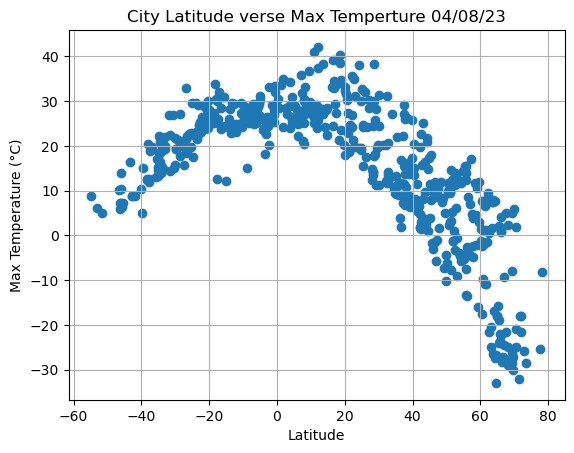

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude verse Max Temperture " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

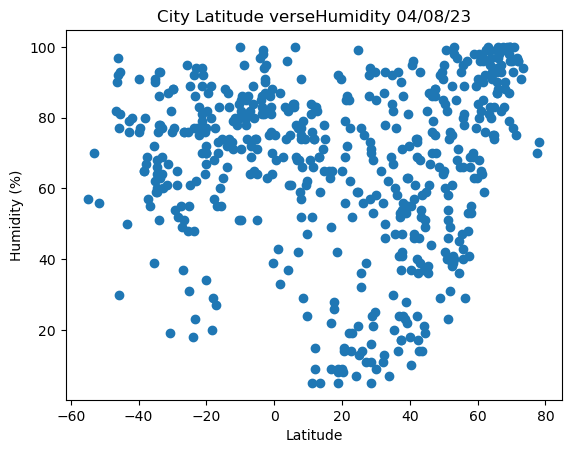

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude verseHumidity " + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

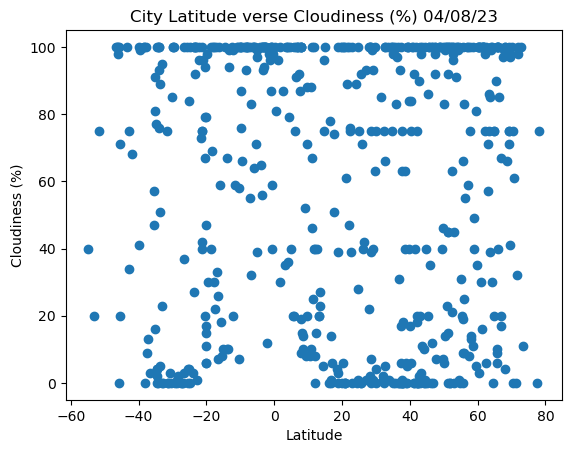

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude verse Cloudiness (%) "  + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

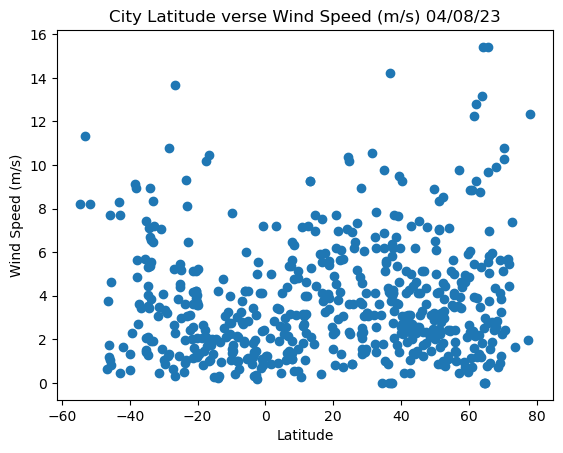

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude verse Wind Speed (m/s) "  + time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),5)}")
    
    
    # create plots

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - Linear Regression of {y_label} verse {x_label} "  + time.strftime("%x"))
    plt.annotate(line_eq, location, color="red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
238,Bridgetown,13.1000,-59.6167,28.27,69,20,9.26,BB,1680959604
382,Topolcani,41.2286,21.4314,11.61,57,92,2.75,MK,1680959638
162,Petropavlovsk-Kamchatskiy,53.0452,158.6483,-0.67,100,100,1.00,RU,1680959579
0,Canchungo,12.0672,-16.0333,37.52,15,8,3.16,GW,1680959539
155,Chokurdakh,70.6333,147.9167,-25.01,100,61,2.44,RU,1680959577
118,Alugan,12.2188,125.4808,25.74,83,15,4.00,PH,1680959570
542,Tomaszow Lubelski,50.4477,23.4162,9.99,60,100,5.02,PL,1680959686
308,Kloulklubed,7.0419,134.2556,25.28,77,100,5.35,PW,1680959625
277,Lasa,46.6166,10.7002,12.05,70,100,2.35,IT,1680959620


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
478,Carutapera,-1.1950,-46.0200,26.77,86,96,0.68,BR,1680959670
298,Santa Maria,-29.6842,-53.8069,19.38,77,100,3.35,BR,1680959623
479,Opuwo,-18.0607,13.8400,30.50,29,100,1.47,NaN,1680959670
526,Mount Gambier,-37.8333,140.7667,11.85,67,100,4.85,AU,1680959684
454,Merauke,-8.4667,140.3333,27.42,78,100,3.04,ID,1680959662
486,Lima,-12.0432,-77.0282,24.94,79,20,3.09,PE,1680959216
10,Codrington,-38.2667,141.9667,12.55,65,100,8.95,AU,1680959541
263,Chuy,-33.6971,-53.4616,21.62,63,5,1.92,UY,1680959617
545,Quatre Cocos,-20.2078,57.7625,27.83,77,47,3.72,MU,1680959686


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: 0.71178


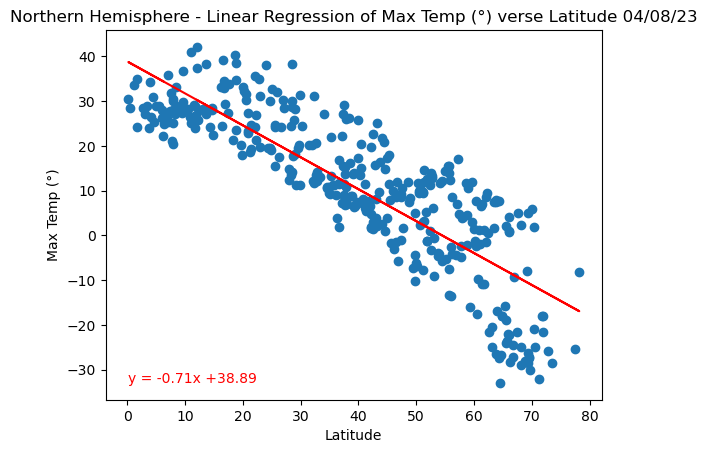

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig1.png")

plt.show()



 The rvalue is: 0.5782


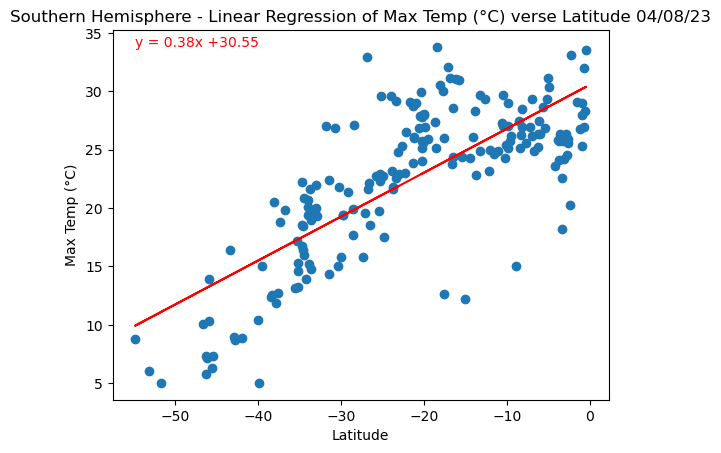

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°C)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig2.png")

plt.show()

Discussion about the linear relationship (04/08/2023): For the northern hemisphere with is a good corralation as the r-values is 0.71 with southern hemisphere has an r-value of 0.55 doesn't show as much of corralation.  With the northern hemisphere plot the data points are much closer to the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.11433


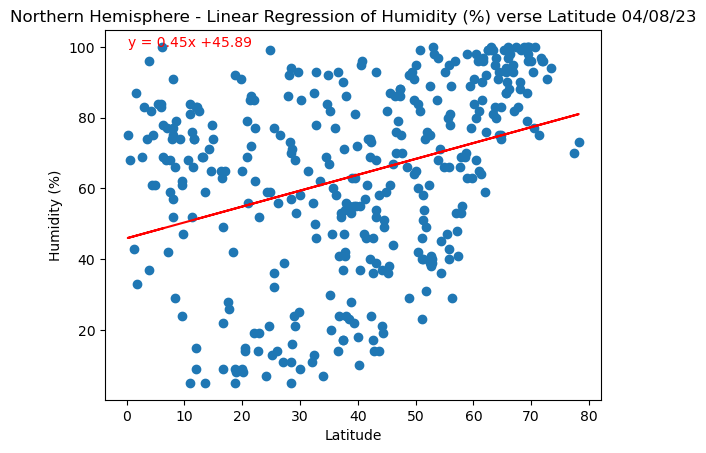

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

In [19]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig4.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 365 and the array at index 1 has size 187

Discussion about the linear relationship: For the northern and southern Humidity there is not a good corration with the data both r-values are 0.11 and 0.13 respectively.  When viewing the plots you can see a wide spread of data points compared to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.00497


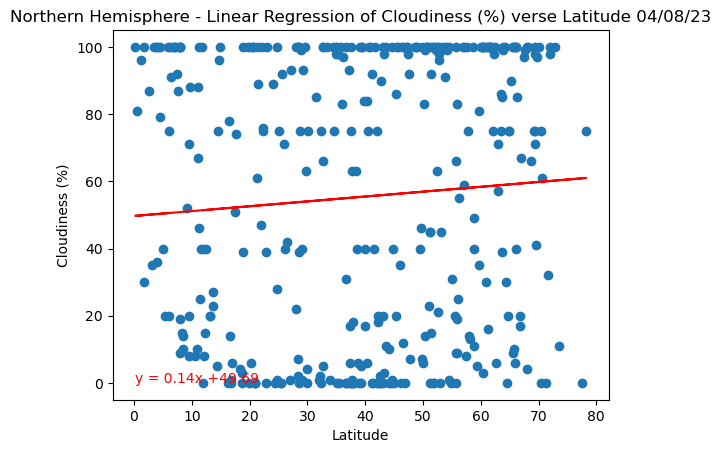

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig5.png")

plt.show()

In [21]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig6.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 365 and the array at index 1 has size 187

Discussion about the linear relationship: For both the northern and southern hemisphers verse the cloudiness doesn't have a strong correlation with the regression line as the r-values are 0.02 and 0.09 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.00782


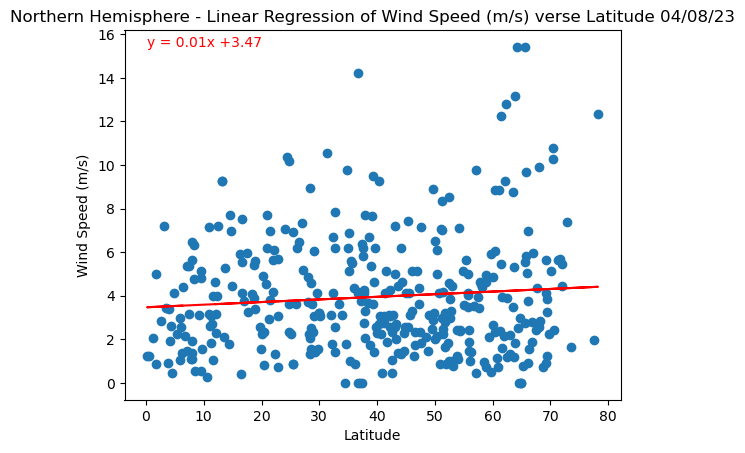

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig7.png")

plt.show()

In [23]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern", (x_vaules.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig8.png")

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 365 and the array at index 1 has size 187

Discussion about the linear relationship: The northern and southern hemispheres verse wind speed doesn't have a good correlation with the regression line with the r-value being 0.11 and 0.26 respectively.